<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Covid_19_Tweet_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covid-19 Tweet Sentimental Analysis using Naive Bayes

__Dataset for analysis can be accessed using the given Kaggle link__

[Link to Kaggle Competition](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)


In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("Corona_NLP_train.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


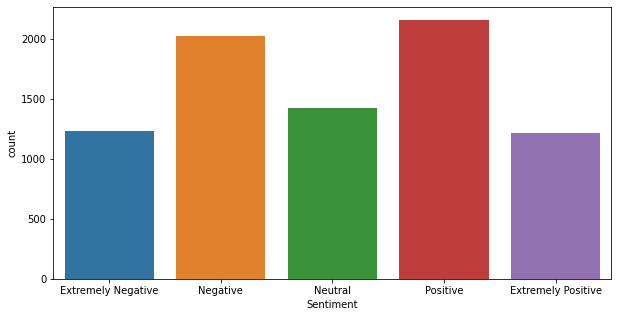

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )

In [5]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


UserName 	-	 0.0
ScreenName 	-	 0.0
Location 	-	 19.689633767846058
TweetAt 	-	 0.0
OriginalTweet 	-	 0.0
Sentiment 	-	 0.012414649286157667


> Here 2 columns ___Location___ and ___Sentiment___ have some null values. Since location does not affects are model as we are not considering it as feature in analysis, we just have to solve Sentiment(Sinc it's our target column).  Since it has only 0.012% Nan values we can just remove them instead of feeding them with dummy classes. 

In [6]:
df = df.drop(df['Sentiment'][df['Sentiment'].isnull()].index, axis=0)  # Removing rows with Nan values in Sentiment column

In [7]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


UserName 	-	 0.0
ScreenName 	-	 0.0
Location 	-	 19.692078470325306
TweetAt 	-	 0.0
OriginalTweet 	-	 0.0
Sentiment 	-	 0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8054 entries, 0 to 8053
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       8054 non-null   int64 
 1   ScreenName     8054 non-null   int64 
 2   Location       6468 non-null   object
 3   TweetAt        8054 non-null   object
 4   OriginalTweet  8054 non-null   object
 5   Sentiment      8054 non-null   object
dtypes: int64(2), object(4)
memory usage: 440.5+ KB


> Since our main columns for analysis "OriginalTweet" contains lots of unnecssary stuff like links, hashtags, mentions etc., we have to clean them and extract the content of tweet. For that I'm using regex and ommitting the perticular sequences which resembles links, hashtags, mentions.

In [9]:
a = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
tweet = []

for i in df["OriginalTweet"]:
  tweet.append(a.sub(" ", i))

df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)


In [10]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


> Since we got our cleaned tweets, now we have to convert them in vectors for classifications.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))     # Here making a set of stopwords (useless words which will not affect the classification)
vectoriser = TfidfVectorizer(stop_words=None)    # of English language do that can be removed while vectorization

In [12]:
X_train = vectoriser.fit_transform(df["CleanedTweet"])

In [13]:
# Encoding the classes in numerical values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])

In [14]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

****

In [15]:
# importing the Test dataset for prediction and testing purposes

test_data = pd.read_csv("Corona_NLP_test.csv")
test_df = pd.DataFrame(test_data)

In [16]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [17]:
# showing column wise %ge of NaN values they contains 

for i in test_df.columns:
  print(i,"\t-\t", test_df[i].isna().mean()*100)


UserName 	-	 0.0
ScreenName 	-	 0.0
Location 	-	 21.958925750394943
TweetAt 	-	 0.0
OriginalTweet 	-	 0.0
Sentiment 	-	 0.0


> Like training dataset, ignoring ___Location___ as it has no significance in classification

In [18]:
a = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
tweet = []

for i in test_df["OriginalTweet"]:
  tweet.append(a.sub(" ", i))

test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)


In [19]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,19 One week everyone...


In [20]:
X_test = vectoriser.transform(test_df["CleanedTweet"])

In [21]:
y_test = encoder.transform(test_df["Sentiment"])

In [22]:
# Prediction

y_pred = classifier.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,0,2
1,4,4
2,1,4
3,2,2
4,3,2


> Plotting ROC Curve (Receiver operating characteristic) for checking the accuracy of classifier.

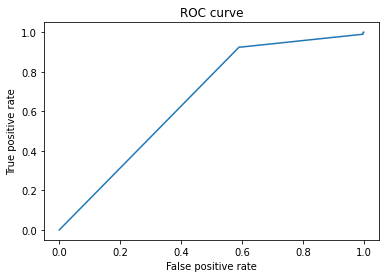

AUC of the predictions: 0.6648814503280188


In [23]:
from sklearn import metrics

# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

> Since we got 0.66 auc score for the classifier, we can say that the classifier (Naive Bayes) is not that good but acceptable. Since more neerer to 1 auc score, more better the classifier.